In [2]:
import ROOT
import ctypes
import math

Welcome to JupyROOT 6.26/04


In [3]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [24]:

loc_file = '/media/jykim/T7/storage/ref_study_signalMC/ntuples/ref_optv1_sigext_D2pippim_signal_own_1M.root'
file_list = [loc_file]
mychain = ROOT.TChain("ref_rho")

for i in file_list:
    mychain.Add(i)

In [25]:
dummy_TH1F = ROOT.TH1F("dummy_TH1F","D0 mass",70,1.82,1.91)

Warning in <TROOT::Append>: Replacing existing TH1: dummy_TH1F (Potential memory leak).


In [26]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06 and event.pi0_veto_isSignal_75MeV==1:
#         if event.D0_M > 1.82 and event.D0_M < 1.91 and event.Dstarp_isSignal==1:
        if event.D0_M > 1.82 and event.D0_M < 1.91 :

        # if event.D0_M > 1.78 and event.D0_M < 1.92:
            histogram.Fill(event.D0_M)
    return histogram

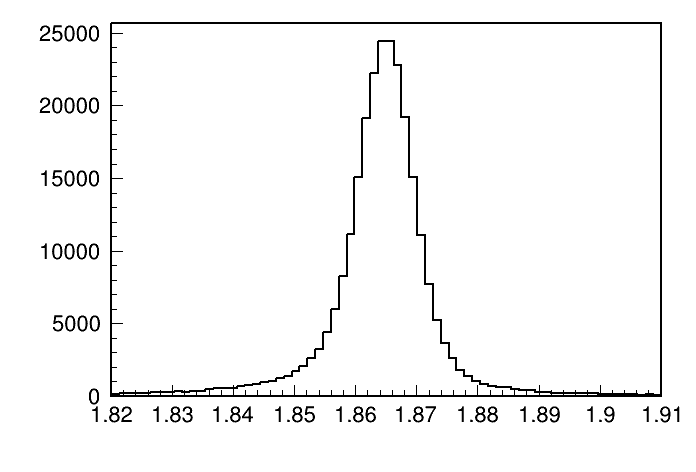

In [27]:
dummy_TH1F = apply_cuts(mychain, dummy_TH1F)
c1 = ROOT.TCanvas()
dummy_TH1F.Draw()
c1.Draw()

In [22]:
dummy_TH1F.GetEntries()

250565.0

In [28]:
dummy_TH1F.GetEntries()

254922.0

In [30]:
250565.0/254922

0.9829084975011965

In [40]:
scale_factor = 1
fitting_region = (1.83, 1.89)
# fitting_region = (1.82, 1.91)

x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
signalhist = ROOT.RooDataHist("sighist", "sighist", l, dummy_TH1F, scale_factor)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(sighist): fit range of variable M(D^{0}) expanded to nearest bin boundaries: [1.83,1.89] --> [1.829,1.89071]


In [42]:
N_total=dummy_TH1F.GetEntries()
print(N_total)

254922.0


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::optimizeConstantTerms: set of constant parameters changed, rerunning const optimizer
 **********
 **   25 **SET PRINT           1
 **********
 **********
 **   26 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.86000e+00  2.00000e-03    1.85000e+00  1.87000e+00
     2 nsig         2.29430e+05 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


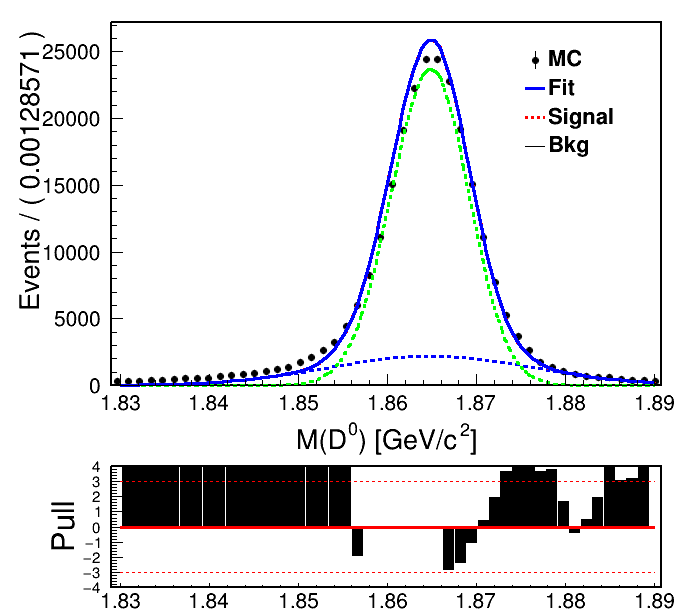

In [45]:
x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
# sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0.001,0.05)
# sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.01,0.001,0.05)

# mean = ROOT.RooRealVar("mean", "mean of gaussians",1.86501,1.86501,1.86501 )
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 1.15101e-02,1.15101e-02,1.15101e-02)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 4.51711e-03,4.51711e-03,4.51711e-03)
sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 4.23601e-03,4.23601e-03,4.23601e-03)

# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)
sig2 = ROOT.RooBifurGauss("sig2", "Signal component 1", x, mean, sigma2,sigma3)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 1.94146e-01)

# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
# c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
# bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)

bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, c0)

# tau = ROOT.RooRealVar("tau", "c1",-15, -20,0)
# bkg_x_model = ROOT.RooExponential("bkg_x_model", "Signal component 1", x, tau)



# data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

data = signalhist

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))



nsig = ROOT.RooRealVar("nsig","# signal events",N_total*0.9,0,N_total)
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",N_total*0.1,0, N_total)
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",0,0,0)


# nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
# nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", sig_model, nsig)

# r = extended_model.fitTo(roodataset,NumCPU=12, Range=fitting_region)

r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



# extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen+3)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)

frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.65, 0.90, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "Fit", "l")
leg1.AddEntry("sig", "Signal", "l")
leg1.AddEntry("bkg", "Bkg", "l")
leg1.SetBorderSize(0)
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
# canv.SaveAs("ref_rho_MC15ri_1ab_DDbar_D0M.png")

In [44]:
print(nsig)

RooRealVar::nsig = 250600 +/- 500.642  L(0 - 254922) 

